<a href="https://colab.research.google.com/github/nsriniva/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [1]:
# YOUR WORK HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#Examination of the Slasher.csv file shows that the first line contains column names
slasher_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'
df = pd.read_csv(slasher_url)

df


,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1
...,...,...,...,...
480,481,0,0,0
481,482,0,0,0
482,483,0,0,0
483,484,0,0,0


###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [2]:
# YOUR WORK HERE
df.head(5)

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [3]:
# YOUR WORK HERE
gender = pd.crosstab(df.Gender, columns='freq')
display(gender)
gender.sum()

col_0,freq
Gender,
0,263
1,222


col_0
freq    485
dtype: int64

In [4]:
gender_rel = pd.crosstab(df.Gender, columns='freq', normalize='columns')

gender_rel

col_0,freq
Gender,
0,0.542268
1,0.457732


Slasher movies have more female than male characters, with 54% female to 46% male.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In Slasher movies most characters die, with only 18% of them surviving.

In [5]:
# YOUR WORK HERE
survival = pd.crosstab(df.Survival, columns='freq')
survival_rel = pd.crosstab(df.Survival, columns='freq', normalize='columns')
display(survival)
display(survival_rel)

col_0,freq
Survival,
0,400
1,85


col_0,freq
Survival,
0,0.824742
1,0.175258


###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [6]:
# YOUR WORK HERE
gender_survival = pd.crosstab(df.Gender, df.Survival, margins=True)
gender_survival

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


Since there are more female than male characters in Slasher movies, we would expect the number of female survivors to be greater than the number of male survivors if there were no relationship between the survival rate and gender. However,  the data shows that the number of female survivors(35) is, in fact, less than the number of male survivors(50) - this implies that there could be a relationship between a character's gender and chance of survival.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [7]:
# YOUR WORK HERE
gender_survival_cond = pd.crosstab(df.Gender, df.Survival, normalize='index')
gender_survival_cond

Survival,0,1
Gender,,
0,0.866920,0.133080
1,0.774775,0.225225


Female characters have a smaller chance of survival(13%/87%) as compared to those(23%/77%) for male characters.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**$H_{0}$:** There is no relationship between character gender and survivability

**$H_{a}$:** There is a relationship between character gender and survivability

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [8]:
# YOUR WORK HERE
_,p,_,_ = chi2_contingency(pd.crosstab(df.Gender, df.Survival))
p

0.011104692591139975

### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

The computed p-value of 0.01 is less than 0.05. Therefore, we can, at the 0.05 significance level, reject the Null hypothesis($H_{0}$) that there is no relationship between character gender and survivability.

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

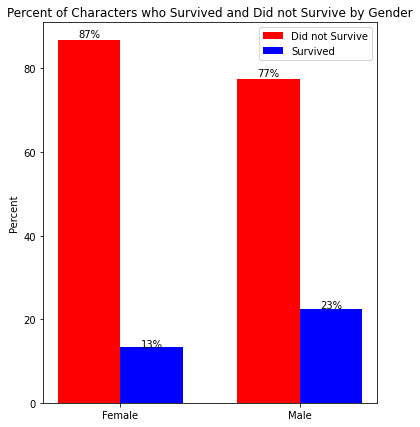

In [21]:
# YOUR WORK HERE
import matplotlib.pyplot as plt

# Number of genders
N =  len(df.Gender.unique())


Died = gender_survival_cond.iloc[:,0]*100 # Percent that died in each gender
Survived = gender_survival_cond.iloc[:,1]*100 #Percent that survived in each gender

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()

fig.set_figheight(7)

rects1 = ax.bar(ind, Died, width, color='r') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percent of Characters who Survived and Did not Survive by Gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female', 'Male'))

for p in ax.patches:
  w = p.get_width()
  h = p.get_height()
  x,y = p.get_xy()

  ax.annotate(f'{h/100:.0%}',(x+w/2,y+h*1.01), ha='center')

ax.legend((rects1[0], rects2[0]), ('Did not Survive', 'Survived'));

A male character has a better chance of surviving in a Slasher movie than a female character.

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [10]:
# YOUR WORK HERE

Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [11]:
# YOUR WORK HERE

Sum up your results in a sentence or two.